In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Activation,Flatten,Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LeNet:
    @staticmethod 
    def build(input_shape,classes):
        model = Sequential()
        model.add(Conv2D(20,kernel_size=5,padding='same',input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model.add(Conv2D(50,kernel_size=5,padding='same',input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [10]:
NB_EPOCH = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("tf")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [11]:
model = LeNet.build(input_shape=INPUT_SHAPE,classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 113s - loss: 0.1792 - acc: 0.9446 - val_loss: 0.0648 - val_acc: 0.9792
Epoch 2/5
48000/48000 [==============================] - 111s - loss: 0.0512 - acc: 0.9837 - val_loss: 0.0430 - val_acc: 0.9866
Epoch 3/5
48000/48000 [==============================] - 123s - loss: 0.0346 - acc: 0.9886 - val_loss: 0.0421 - val_acc: 0.9867
Epoch 4/5
48000/48000 [==============================] - 114s - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0398 - val_acc: 0.9874
Epoch 5/5
48000/48000 [==============================] - 131s - loss: 0.0188 - acc: 0.9939 - val_loss: 0.0336 - val_acc: 0.9894


In [13]:
score = model.evaluate(X_test,y_test,verbose=VERBOSE)

 9984/10000 [============================>.] - ETA: 0s

In [15]:
print("Test score:", score[0])
print('Test accuracy:', score[1])

Test score: 0.0244145629686
Test accuracy: 0.9918


In [16]:
print(history.history.keys())

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


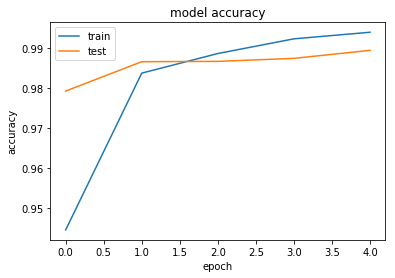

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

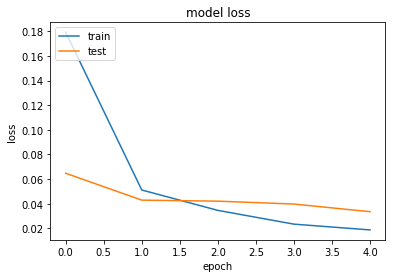

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()